In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
original_dataset = pd.read_csv('/Users/irvingestrada/Documents/Maestría/9- Procesamiento y Clasificacion de Datos/Datasets/APPLE_iPhone_SE.csv')

In [3]:
original_dataset.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [4]:
dataset = original_dataset

In [5]:
def value_counts_plot(df, column=None, top=None, fontsize=15):
    if top is not None:
        label_counts = df[column].value_counts().head(top)
    else:
        label_counts = df[column].value_counts()
    
    plt.figure(figsize=(15,10))
    plt.style.use('seaborn')
    if top is not None:
        bar_colors = cm.rainbow(np.linspace(0,1,top))
    else:
        bar_colors = cm.rainbow(np.linspace(0,1,len(df[column].unique())))
    plt.bar(label_counts.index.values,
            label_counts.values,
            color=bar_colors,
            linewidth=0,
            alpha=0.6)
    plt.tick_params(labelsize=fontsize)
    if top is not None:
        plt.xticks(rotation=-45, ha='left')
        plt.xlabel(f'{column} top {top}', fontsize=fontsize)
    else:
        plt.xlabel(column, fontsize=fontsize)
    plt.ylabel(f'{column} value counts', fontsize=fontsize)
    plt.show()

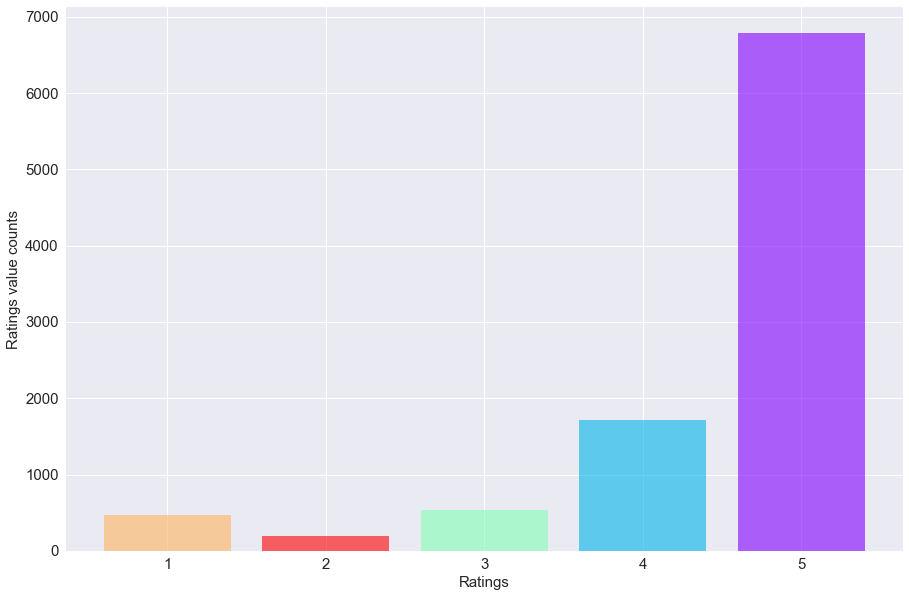

In [6]:
value_counts_plot(dataset, column='Ratings')

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
tb_counts = dataset.Ratings.value_counts()
tb_counts

5    6788
4    1717
3     535
1     474
2     199
Name: Ratings, dtype: int64

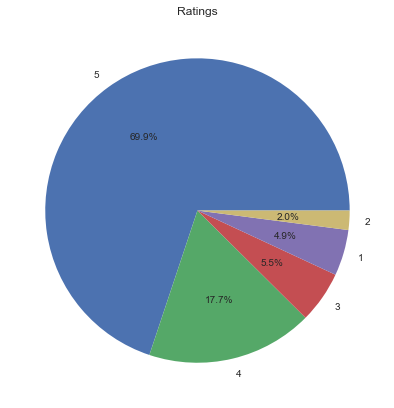

In [9]:
tb_count= dataset.Ratings.value_counts()
plt.figure(figsize=(10, 7))
plt.title("Ratings")
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
plt.show()

In [10]:
import re
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [12]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

url_pattern = re.compile(r'https?://\S+|www\.\S+')

spell = SpellChecker(distance=2)
wordnet_lemmatizer = WordNetLemmatizer()

In [13]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [14]:
def data_clean(text):
    #Removing READ MORE
    text = text.replace('...READ MORE', '')
    text = text.replace('READ MORE', '')
    
    #Removing Emojis
    text = emoji_pattern.sub(r'', text)
    
    #Removing URL
    text = url_pattern.sub(r'', text)
    
    #Removing puctuations signs and numbers, lower cases
    text = re.sub('[^a-zA-Z]',' ',text).lower()
    
    #SpellChecker
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    text = " ".join(corrected_text)
    
    return text
    
    

In [15]:
def clean2(text):
    #Lemmatizar
    text = lemmatize(text)
    
    #Tokenization
    text =  text.replace('hr', '').replace('th', '').split()
    
    #Removing StopWords
    text = [word for word in text if not word in stopwords.words('english')]
    
    text = " ".join(text)
    return text

In [16]:
dataset["Cleaned_Reviews"] = dataset["Reviews"].apply(data_clean)

In [17]:
dataset["POS_tagged"] = dataset["Cleaned_Reviews"].apply(token_stop_pos)

In [18]:
dataset["Cleaned_Reviews"] = dataset["POS_tagged"].apply(clean2)

In [19]:
dataset.head()

,Ratings,Comment,Reviews,Cleaned_Reviews,POS_tagged
0,5,Super!,Great camera for pics and videos Battery life ...,great camera pic video battery life good far s...,"[(great, a), (camera, n), (pics, n), (videos, ..."
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,great device let tell pro superb build quality...,"[(great, a), (device, n), (let, v), (tell, v),..."
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",love old size e inch type definitely go noing ...,"[(loves, v), (older, a), (size, n), (e, v), (i..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,iphone se best phone ever get beautifully desi...,"[(iphone, n), (se, n), (best, a), (phone, n), ..."
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,second iphone iphone long time android user te...,"[(second, a), (iphone, n), (iphone, n), (long,..."


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones

## Preprocesado Prediccion

In [21]:
original_dataset.head()

,Ratings,Comment,Reviews,Cleaned_Reviews,POS_tagged
0,5,Super!,Great camera for pics and videos Battery life ...,great camera pic video battery life good far s...,"[(great, a), (camera, n), (pics, n), (videos, ..."
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,great device let tell pro superb build quality...,"[(great, a), (device, n), (let, v), (tell, v),..."
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",love old size e inch type definitely go noing ...,"[(loves, v), (older, a), (size, n), (e, v), (i..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,iphone se best phone ever get beautifully desi...,"[(iphone, n), (se, n), (best, a), (phone, n), ..."
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,second iphone iphone long time android user te...,"[(second, a), (iphone, n), (iphone, n), (long,..."


In [22]:
processed_features = original_dataset['Cleaned_Reviews']
labels = original_dataset['Ratings']

In [23]:
from imblearn.over_sampling import SMOTE 

In [24]:
labels.value_counts()

5    6788
4    1717
3     535
1     474
2     199
Name: Ratings, dtype: int64

In [25]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [27]:
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [28]:
pd.DataFrame(processed_features).head()

,0,1,2,3,4,5,6,7,8,9,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138207,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.152588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144405,0.0


In [29]:
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(processed_features, labels)

In [30]:
pd.DataFrame(y_res)['Ratings']

0        5
1        5
2        5
3        5
4        5
        ..
33935    4
33936    4
33937    4
33938    4
33939    4
Name: Ratings, Length: 33940, dtype: int64

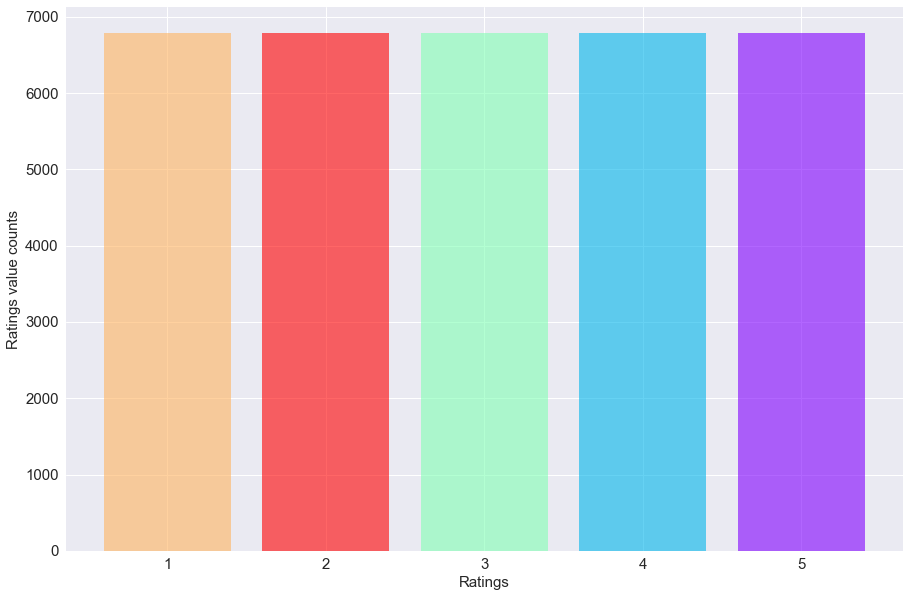

In [31]:
value_counts_plot(pd.DataFrame(y_res), column='Ratings')

In [32]:
tb_counts = pd.DataFrame(y_res).Ratings.value_counts()
tb_counts

5    6788
4    6788
3    6788
1    6788
2    6788
Name: Ratings, dtype: int64

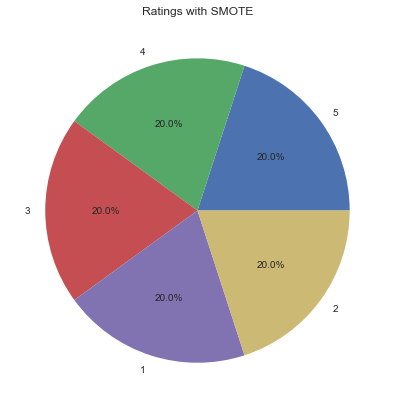

In [33]:
tb_count= pd.DataFrame(y_res).Ratings.value_counts()
plt.figure(figsize=(10, 7))
plt.title("Ratings with SMOTE")
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [35]:
import numpy as np

In [36]:
np.shape(X_train)[1]

1050

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [38]:
predictions = text_classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions)

Text(0.5, 29.5, 'Predicted label')

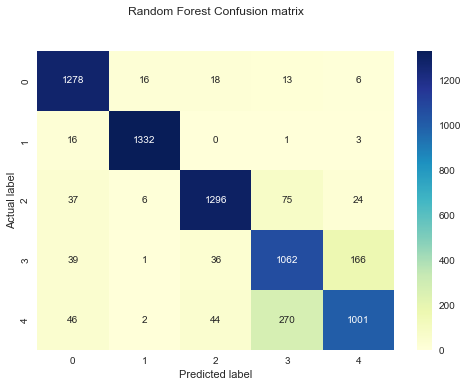

In [40]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93      1331
           2       0.98      0.99      0.98      1352
           3       0.93      0.90      0.92      1438
           4       0.75      0.81      0.78      1304
           5       0.83      0.73      0.78      1363

    accuracy                           0.88      6788
   macro avg       0.88      0.88      0.88      6788
weighted avg       0.88      0.88      0.88      6788

0.879345904537419


# PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(whiten=True)

# Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
predictions = tree_clf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions)

Text(0.5, 29.5, 'Predicted label')

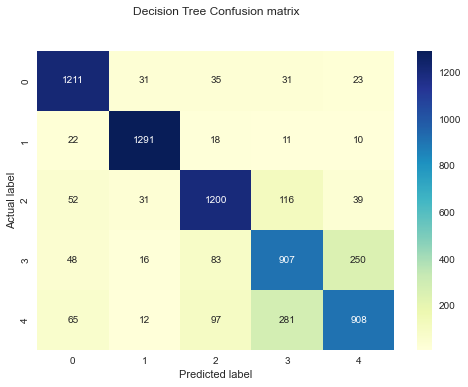

In [48]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      1331
           2       0.93      0.95      0.94      1352
           3       0.84      0.83      0.84      1438
           4       0.67      0.70      0.68      1304
           5       0.74      0.67      0.70      1363

    accuracy                           0.81      6788
   macro avg       0.81      0.81      0.81      6788
weighted avg       0.81      0.81      0.81      6788

0.8127578078962876


In [50]:
from sklearn import tree
import graphviz 

[Text(0.5, 0.875, 'X[79] <= 0.0\ngini = 0.8\nsamples = 27152\nvalue = [5457, 5436, 5350, 5484, 5425]'),
 Text(0.25, 0.625, 'X[70] <= 0.0\ngini = 0.778\nsamples = 14811\nvalue = [3364, 1686, 2127, 3188, 4446]'),
 Text(0.125, 0.375, 'X[1034] <= 0.0\ngini = 0.773\nsamples = 13690\nvalue = [2671, 1463, 2043, 3103, 4410]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[389] <= 0.001\ngini = 0.566\nsamples = 1121\nvalue = [693, 223, 84, 85, 36]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[389] <= 0.0\ngini = 0.77\nsamples = 12341\nvalue = [2093, 3750, 3223, 2296, 979]'),
 Text(0.625, 0.375, 'X[70] <= 0.0\ngini = 0.761\nsamples = 7910\nvalue = [1869, 2576, 1823, 1101, 541]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[733] <= 0.001\ngini = 0.745\nsamples = 4431\nvalue = [224, 1174, 1400, 1195, 438]'),
 Text(0.8125, 0.125, '\

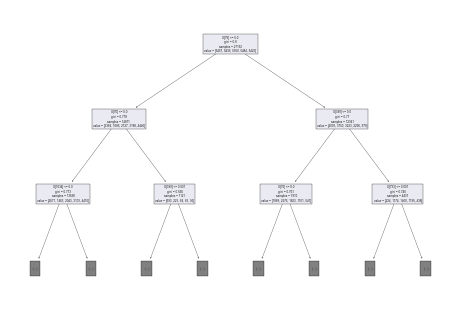

In [62]:
tree.plot_tree(tree_clf,max_depth=2)


In [54]:
pca.fit(X_res)
variance = pd.DataFrame(pca.explained_variance_ratio_)
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))

,0
0,0.056877
1,0.102212
2,0.132075
3,0.158695
4,0.180379
...,...
1045,0.999957
1046,0.999971
1047,0.999984
1048,0.999996


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
predictions = knn.predict(X_test)

In [59]:
cm = confusion_matrix(y_test,predictions)

Text(0.5, 29.5, 'Predicted label')

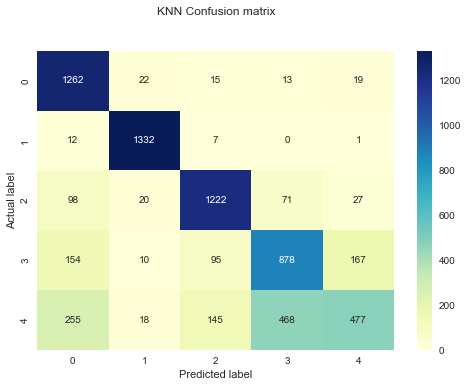

In [60]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.71      0.95      0.81      1331
           2       0.95      0.99      0.97      1352
           3       0.82      0.85      0.84      1438
           4       0.61      0.67      0.64      1304
           5       0.69      0.35      0.46      1363

    accuracy                           0.76      6788
   macro avg       0.76      0.76      0.74      6788
weighted avg       0.76      0.76      0.75      6788

0.7617855038302888
